In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import analyze
from vsim import load
import matplotlib.pyplot as plt

path = '/media/robert/Data_Storage/VSim/NonWaistTest/'
simName = 'Drive_Witness_Ramps'

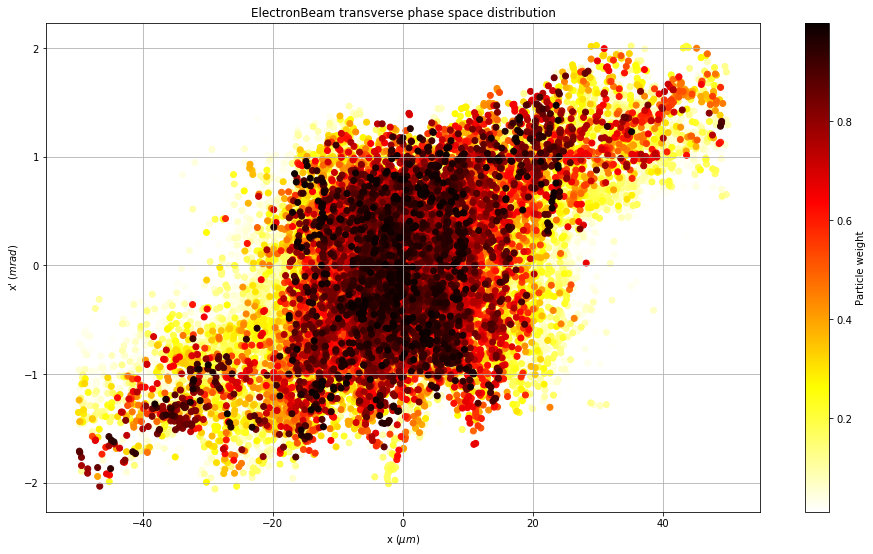

In [2]:
params = {'species' : 'ElectronBeam',
          'dumpInd' : 50,
          'path' : path,
          'simName' : simName,
          'cutoff' : 1e-2,
          'cmap' : 'jet'
          }
plot.phase_space(params)

In [5]:
# Get useful parameters about the beam
species = 'ElectronBeam'
dump = 50
fileName = plot.get_filename(path, simName, species, dump)
data = load.get_species_data(fileName, species)
y = analyze.get_y(data)
ux = analyze.get_ux(data)
uy = analyze.get_uy(data)
weights = analyze.get_weights(data)
yp = uy / ux
dy = y - np.average(y, weights=weights)
dyp = yp - np.average(yp, weights=weights)
# Calculate the RMS sizes and the correlation
sigmay = np.sqrt(np.average(dy**2, weights=weights))
sigmayp = np.sqrt(np.average(dyp**2, weights=weights))
sigmayyp = np.sqrt(np.average(dy*dyp, weights=weights))
emittance = analyze.get_emittance(data)*20000

print('emittance:', emittance)
print('sigmay:', sigmay)
print('sigmayp:', sigmayp)
print('sigmayyp:', sigmayyp)

emittance: 143.244475705
sigmay: 1.3230126384e-05
sigmayp: 0.000646716492161
sigmayyp: 6.84165357424e-05
